### Machine Learning

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import dython
from dython.nominal import associations
import warnings 
warnings.filterwarnings('ignore')

### Getting Data Information

In [2]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


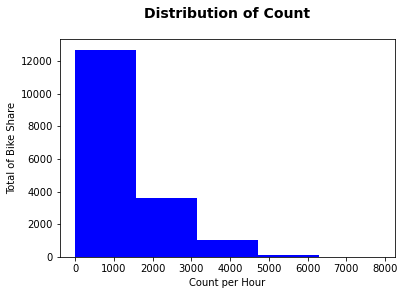

In [6]:
plt.hist(df["cnt"], bins = 5, color = "Blue")
plt.title("Distribution of Count", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel("Total of Bike Share")
plt.xlabel("Count per Hour")
plt.show()

### Data Preparation and Feature Engineering

In [7]:
timedt = df['timestamp'].dt
df['year'] = timedt.year
df['month'] = timedt.month_name()
df['day'] = timedt.day_name()
df['hour'] = timedt.hour

In [8]:
df['is_holiday'] = df['is_holiday'].map({0:'No',1:"Yes"})
df['is_weekend'] = df['is_weekend'].map({0:'Weekdays',1:"Weekend"})
df['weather_code'] = df['weather_code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 4:"Cloudy", 
                                             7:"light Rain shower", 10:"rain with thunderstorm", 26:"snowfall", 94:"Freezing Fog"})

In [9]:
df['day'] = df['day'].astype('object')
df['season'] = df['season'].astype('object')
df['year'] = df['year'].astype('object')

In [10]:
df['day'] = df['day'].astype('object')
df['season'] = df['season'].astype('object')
df['year'] = df['year'].astype('object')

In [14]:
df = df.drop(columns = ['timestamp'])

In [15]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday       object
is_weekend       object
season          float64
year              int64
month            object
day              object
hour              int64
dtype: object

### Checking Correlation and Association

In [16]:
correlation = df.corr()
correlation['cnt'].sort_values(ascending = False)[1:]

t1            0.388798
t2            0.369035
hour          0.324423
wind_speed    0.116295
year          0.010046
season       -0.116180
hum          -0.462901
Name: cnt, dtype: float64

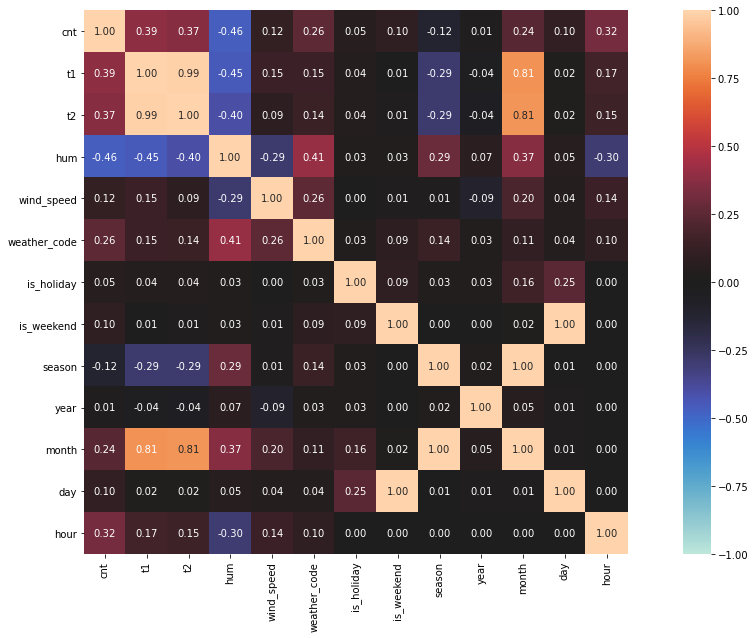

In [17]:
associations(df,figsize=(20,10))
plt.show()

### Importing Machine Learning Package

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

### Feature Selection and Splitting Data

- Based on correlation and Association we going to choose month, weahter_code, day, t1, t2, , hum, wind_speed, and hour as our feautre for machine learning
- The reason I drop year is that becasue the year is not relevant with predicting bike shares since the condition is almost the same of every year
- as for is holiday and weekend we can see from the EDA that it is not much big deal
- As for season its redudant to put month and season together

In [21]:
X = df.drop(columns = ['cnt','is_weekend','season','is_holiday', 'year'])
y = df['cnt']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [23]:
cat_columns = ['month','weather_code','day']

num_columns = ['t1','t2','hum','wind_speed','hour']

### Pipline

In [24]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [25]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor())
])

In [26]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor())
])


In [27]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

pipe_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

### KNN Base Model

In [28]:
KNNpipe = pipe_KNN.fit(X_train, y_train)

In [29]:
KNN_pipe_train = KNNpipe.predict(X_train)
KNN_pipe_test = KNNpipe.predict(X_test)

In [30]:
#KNN Train
knn_R2_train = r2_score(y_train, KNN_pipe_train)
knn_MAE_train = mean_absolute_error(y_train, KNN_pipe_train)
knn_MSE_train = mean_squared_error(y_train, KNN_pipe_train)
knn_RMSE_train = np.sqrt(knn_MSE_train)
#KNN Test
knn_R2_test = r2_score(y_test, KNN_pipe_test)
knn_MAE_test = mean_absolute_error(y_test, KNN_pipe_test)
knn_MSE_test = mean_squared_error(y_test, KNN_pipe_test)
knn_RMSE_test = np.sqrt(knn_MSE_test)

In [31]:
data = {
    "R2 Score" : [knn_R2_train,knn_R2_test],
    "MAE" : [knn_MAE_train,knn_MAE_test],
    "MSE" : [knn_MSE_train,knn_MSE_test],
    "RMSE" : [knn_RMSE_train,knn_RMSE_test]}
df_scoreknn =  pd.DataFrame(data = data, index = ['KNN Train', 'KNN Test'])
df_scoreknn

,R2 Score,MAE,MSE,RMSE
KNN Train,0.664453,397.651468,393319.947539,627.152252
KNN Test,0.431055,525.330233,681734.498949,825.672150


### Decision Tree Base Model

In [32]:
DT_pipe = pipe_DT.fit(X_train, y_train)

In [33]:
DT_pipe_train = DT_pipe.predict(X_train)
DT_pipe_test = DT_pipe.predict(X_test)

In [34]:
#DT Train
DT_R2_train = r2_score(y_train, DT_pipe_train)
DT_MAE_train = mean_absolute_error(y_train, DT_pipe_train)
DT_MSE_train = mean_squared_error(y_train, DT_pipe_train)
DT_RMSE_train = np.sqrt(DT_MSE_train)
#DT Test
DT_R2_test = r2_score(y_test, DT_pipe_test)
DT_MAE_test = mean_absolute_error(y_test, DT_pipe_test)
DT_MSE_test = mean_squared_error(y_test, DT_pipe_test)
DT_RMSE_test = np.sqrt(DT_MSE_test)

In [35]:
data = {
    "R2 Score" : [DT_R2_train,DT_R2_test],
    "MAE" : [DT_MAE_train,DT_MAE_test],
    "MSE" : [DT_MSE_train,DT_MSE_test],
    "RMSE" : [DT_RMSE_train,DT_RMSE_test]}
df_dt =  pd.DataFrame(data = data, index = ['DT Train', 'DT Test'])
df_dt

,R2 Score,MAE,MSE,RMSE
DT Train,0.999986,0.093820,16.972184,4.119731
DT Test,0.880373,191.910566,143342.573715,378.606093


### Random Forest Base Model

In [36]:
RF_pipe = pipe_RF.fit(X_train,y_train)

In [37]:
RF_pipe_train = RF_pipe.predict(X_train)
RF_pipe_test = RF_pipe.predict(X_test)

In [38]:
#RF Train
RF_R2_train = r2_score(y_train, RF_pipe_train)
RF_MAE_train = mean_absolute_error(y_train, RF_pipe_train)
RF_MSE_train = mean_squared_error(y_train, RF_pipe_train)
RF_RMSE_train = np.sqrt(RF_MSE_train)
#RF Test
RF_R2_test = r2_score(y_test, RF_pipe_test)
RF_MAE_test = mean_absolute_error(y_test, RF_pipe_test)
RF_MSE_test = mean_squared_error(y_test, RF_pipe_test)
RF_RMSE_test = np.sqrt(RF_MSE_test)

In [39]:
data = {
    "R2 Score" : [RF_R2_train,RF_R2_test],
    "MAE" : [RF_MAE_train,RF_MAE_test],
    "MSE" : [RF_MSE_train,RF_MSE_test],
    "RMSE" : [RF_RMSE_train,RF_RMSE_test]}
df_rf =  pd.DataFrame(data = data, index = ['RF Train', 'RF Test'])
df_rf

,R2 Score,MAE,MSE,RMSE
RF Train,0.990874,52.624292,10697.200483,103.427271
RF Test,0.943415,137.927993,67802.232050,260.388617


### XGB Base Model

In [40]:
XGB_pipe = pipe_XGB.fit(X_train, y_train)

In [41]:
XGB_pipe_train = XGB_pipe.predict(X_train)
XGB_pipe_test = XGB_pipe.predict(X_test)

In [42]:
#XGB Train
XGB_R2_train = r2_score(y_train, XGB_pipe_train)
XGB_MAE_train = mean_absolute_error(y_train, XGB_pipe_train)
XGB_MSE_train = mean_squared_error(y_train, XGB_pipe_train)
XGB_RMSE_train = np.sqrt(XGB_MSE_train)
#XGB Test
XGB_R2_test = r2_score(y_test, XGB_pipe_test)
XGB_MAE_test = mean_absolute_error(y_test, XGB_pipe_test)
XGB_MSE_test = mean_squared_error(y_test, XGB_pipe_test)
XGB_RMSE_test = np.sqrt(XGB_MSE_test)

In [43]:
data = {
    "R2 Score" : [XGB_R2_train,XGB_R2_test],
    "MAE" : [XGB_MAE_train,XGB_MAE_test],
    "MSE" : [XGB_MSE_train,XGB_MSE_test],
    "RMSE" : [XGB_RMSE_train,XGB_RMSE_test]}
df_xgb =  pd.DataFrame(data = data, index = ['XGB Train', 'XGB Test'])
df_xgb

,R2 Score,MAE,MSE,RMSE
XGB Train,0.974205,102.950691,30236.267473,173.885789
XGB Test,0.945396,147.472073,65428.523796,255.789999


### Base Model Sumarry

In [95]:
database = {
    "R2 Score" : [knn_R2_train, knn_R2_test, RF_R2_train,RF_R2_test, DT_R2_train, DT_R2_test, XGB_R2_train, XGB_R2_test],
    "MAE" : [knn_MAE_train,knn_MAE_test, RF_MAE_train,RF_MAE_test, DT_MAE_train, DT_MAE_test, XGB_MAE_train, XGB_MAE_test],
    "MSE" : [knn_MSE_train,knn_MSE_test, RF_MSE_train,RF_MSE_test_tuned, DT_MSE_train, DT_MSE_test_tuned, XGB_MSE_train_tuned, XGB_MSE_test],
    "RMSE" : [knn_RMSE_train,knn_RMSE_test, RF_RMSE_train,RF_RMSE_test, DT_RMSE_train, DT_RMSE_test, XGB_RMSE_train, XGB_RMSE_test]}
dfbase=  pd.DataFrame(data = database, index = ['KNN Train', 'KNN Test','RF Train ', 'RF Test ', 'DT Train ', 'DT Test', 'XGB Train', 'XGB Test'])
dfbase

,R2 Score,MAE,MSE,RMSE
KNN Train,0.664453,397.651468,393319.947539,627.152252
KNN Test,0.431055,525.330233,681734.498949,825.672150
RF Train,0.990874,52.624292,10697.200483,103.427271
RF Test,0.943415,137.927993,72914.841336,260.388617
DT Train,0.999986,0.093820,16.972184,4.119731
DT Test,0.880373,191.910566,96037.423133,378.606093
XGB Train,0.974205,102.950691,13411.265196,173.885789
XGB Test,0.945396,147.472073,65428.523796,255.789999


- Looking from the summary some model is still overfit and need tuning. So far the best model is Random Forest and XGB. We going to tuned 3 models Random Forest, Decision Tree and XGB

### Random Forest Tuned

In [44]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['month', 'weather_code', 'day'])])),
  ('algo', RandomForestRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['t1', 't2', 'hum', 'wind_speed', 'hour']),
                                 ('categoric',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),

In [45]:
param_RF = {'algo__max_depth': [None,2,5,10],
           'algo__min_samples_leaf': [4,10,20],
            'algo__min_samples_split': [8,20,40],
           'algo__n_estimators':[400,600,800],
           'algo__max_features':['auto','sqrt'],}

In [46]:
model_RF = RandomizedSearchCV(estimator= pipe_RF, param_distributions=param_RF, n_jobs=-1, cv=3, verbose=1,scoring='r2')

In [52]:
model_RF.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['t1',
                                                                                't2',
                                                                                'hum',
                                                                                'wind_speed',
                                                                                'hour']),
                                                                              ('categoric',
                                                                         

In [53]:
RF_tuned = model_RF.best_estimator_

In [54]:
RF_pipe_train_tuned = RF_tuned.predict(X_train)
RF_pipe_test_tuned = RF_tuned.predict(X_test)

In [55]:
#RF tuned Train
RF_R2_train_tuned = r2_score(y_train, RF_pipe_train_tuned)
RF_MAE_train_tuned = mean_absolute_error(y_train, RF_pipe_train_tuned)
RF_MSE_train_tuned = mean_squared_error(y_train, RF_pipe_train)
RF_RMSE_train_tuned = np.sqrt(RF_MSE_train_tuned)
#RF tuned Test
RF_R2_test_tuned = r2_score(y_test, RF_pipe_test_tuned)
RF_MAE_test_tuned = mean_absolute_error(y_test, RF_pipe_test_tuned)
RF_MSE_test_tuned = mean_squared_error(y_test, RF_pipe_test_tuned)
RF_RMSE_test_tuned = np.sqrt(RF_MSE_test_tuned)

In [56]:
data = {
    "R2 Score" : [RF_R2_train_tuned,RF_R2_test_tuned],
    "MAE" : [RF_MAE_train_tuned,RF_MAE_test_tuned],
    "MSE" : [RF_MSE_train_tuned,RF_MSE_test_tuned],
    "RMSE" : [RF_RMSE_train_tuned,RF_RMSE_test_tuned]}
df_rf_tuned =  pd.DataFrame(data = data, index = ['RF Train Tuned', 'RF Test Tuned'])
df_rf_tuned

,R2 Score,MAE,MSE,RMSE
RF Train Tuned,0.954031,120.236168,10697.200483,103.427271
RF Test Tuned,0.939149,145.739943,72914.841336,270.027483


In [57]:
y_predict_test = model_RF.predict(X_test)

In [60]:
actual_predict = pd.DataFrame(data = {'actual':y_test, 'predicted': y_predict_test})

In [61]:
actual_predict.head()

,actual,predicted
14097,66,63.556545
10978,1749,1833.271610
7408,172,237.323321
6375,2866,2852.063982
6874,1550,1259.865711


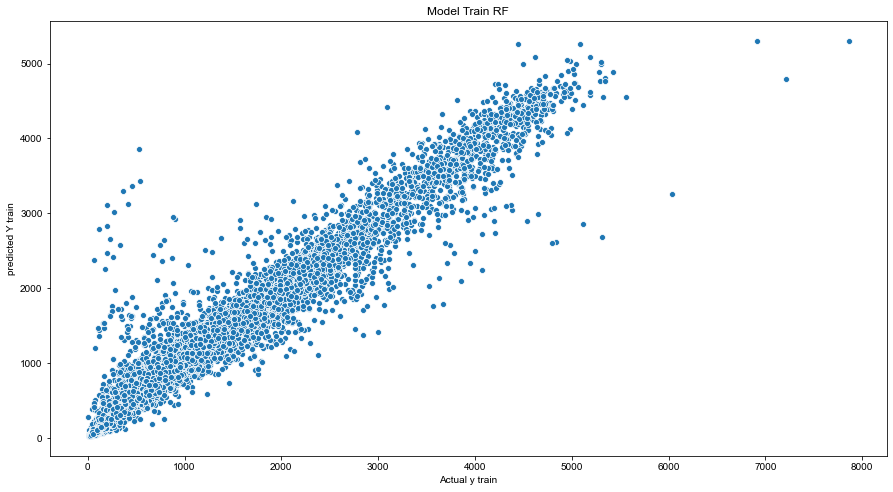

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_train,RF_pipe_train_tuned)
plt.title('Model Train RF')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

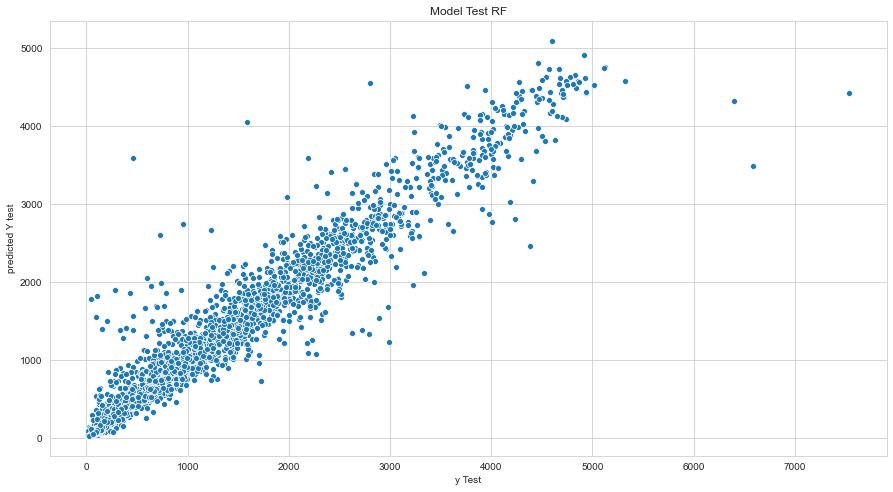

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_test,RF_pipe_test_tuned)
plt.title('Model Test RF')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

### Decision Tree Tuned

In [64]:
pipe_DT.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['month', 'weather_code', 'day'])])),
  ('algo', DecisionTreeRegressor())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['t1', 't2', 'hum', 'wind_speed', 'hour']),
                                 ('categoric',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),

In [65]:
param_DT = {'algo__max_depth':[None,1,3, 5],
            'algo__min_samples_leaf': [4,10,20],
            'algo__min_samples_split': [8,20,40],
           'algo__max_features':['auto','sqrt'],
            'algo__max_features':['auto','sqrt']}

In [66]:
model_DT = GridSearchCV(estimator = pipe_DT, param_grid = param_DT, n_jobs=-1, cv=3, verbose=1,scoring='r2')

In [67]:
model_DT.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    9.6s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['t1',
                                                                          't2',
                                                                          'hum',
                                                                          'wind_speed',
                                                                          'hour']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('encoder',
                                      

In [68]:
model_DT.best_params_

{'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__min_samples_leaf': 4,
 'algo__min_samples_split': 20}

In [69]:
DT_tuned = model_DT.best_estimator_

In [70]:
DT_pipe_train_tuned = DT_tuned.predict(X_train)
DT_pipe_test_tuned = DT_tuned.predict(X_test)

In [71]:
#DT tuned Train
DT_R2_train_tuned = r2_score(y_train, DT_pipe_train_tuned)
DT_MAE_train_tuned = mean_absolute_error(y_train, DT_pipe_train_tuned)
DT_MSE_train_tuned = mean_squared_error(y_train, DT_pipe_train_tuned)
DT_RMSE_train_tuned = np.sqrt(DT_MSE_train_tuned)
#DT tuned Test
DT_R2_test_tuned = r2_score(y_test, DT_pipe_test_tuned)
DT_MAE_test_tuned = mean_absolute_error(y_test, DT_pipe_test_tuned)
DT_MSE_test_tuned = mean_squared_error(y_test, DT_pipe_test_tuned)
DT_RMSE_test_tuned = np.sqrt(DT_MSE_test_tuned)

In [72]:
data = {
    "R2 Score" : [DT_R2_train_tuned,DT_R2_test_tuned],
    "MAE" : [DT_MAE_train_tuned,DT_MAE_test_tuned],
    "MSE" : [DT_MSE_train_tuned,DT_MSE_test_tuned],
    "RMSE" : [DT_RMSE_train_tuned,DT_RMSE_test_tuned]}
df_dt_tuned =  pd.DataFrame(data = data, index = ['DT Train Tuned', 'DT Test Tuned'])
df_dt_tuned

,R2 Score,MAE,MSE,RMSE
DT Train Tuned,0.952454,126.106827,55731.882620,236.076010
DT Test Tuned,0.919851,166.768347,96037.423133,309.899053


In [73]:
y_pred_dt=model_DT.predict(X_test)

In [74]:
actual_predict_dt = pd.DataFrame(data = {'actual':y_test, 'predicted': y_pred_dt})
actual_predict_dt.head()

,actual,predicted
14097,66,57.000000
10978,1749,1980.315789
7408,172,179.000000
6375,2866,2957.454545
6874,1550,1086.625000


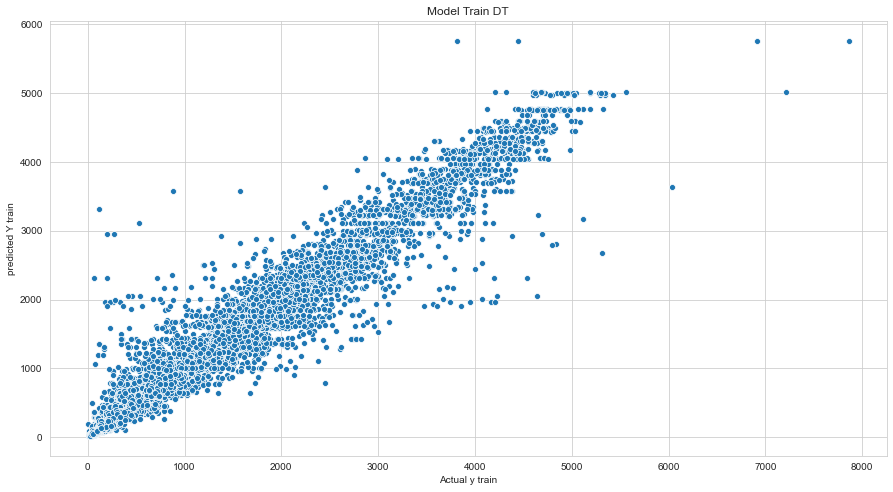

In [75]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_train,DT_pipe_train_tuned)
plt.title('Model Train DT')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

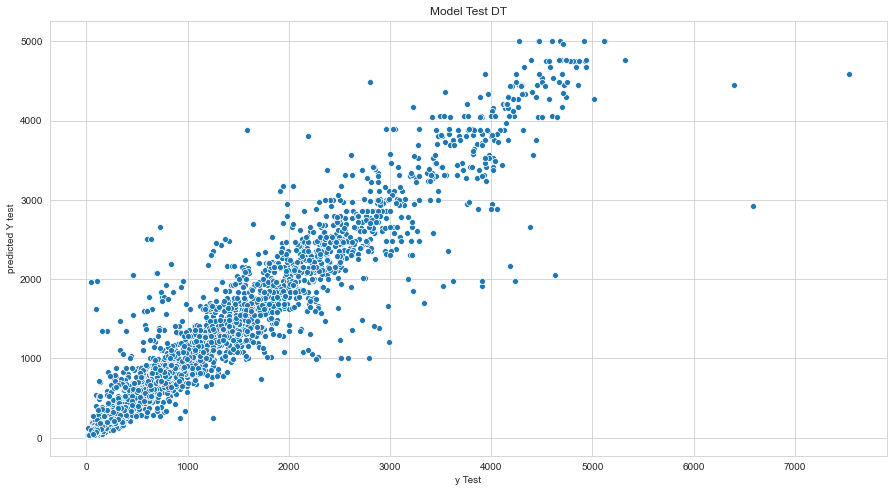

In [76]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_test,DT_pipe_test_tuned)
plt.title('Model Test DT')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

### XGB Tuned

In [77]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['t1', 't2', 'hum', 'wind_speed', 'hour']),
                                   ('categoric',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['month', 'weather_code', 'day'])])),
  ('algo',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
               

In [78]:
param_XGB = {'algo__max_depth':[5,6,7,9],
             'algo__learning_rate':[0.1,0.2,0.5,1],
             'algo__n_estimators':[100,200,300,400],
             'algo__gamma':[0,3,5]}

In [79]:
model_XGB = RandomizedSearchCV(estimator= pipe_XGB, param_distributions=param_XGB, n_jobs=-1, cv=3, verbose=1,scoring='r2')

In [80]:
model_XGB.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.5s finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['t1',
                                                                                't2',
                                                                                'hum',
                                                                                'wind_speed',
                                                                                'hour']),
                                                                              ('categoric',
                                                                         

In [81]:
model_XGB.best_params_

{'algo__n_estimators': 400,
 'algo__max_depth': 7,
 'algo__learning_rate': 0.1,
 'algo__gamma': 0}

In [82]:
XGB_tuned = model_XGB.best_estimator_

In [83]:
XGB_pipe_train_tuned = XGB_tuned.predict(X_train)
XGB_pipe_test_tuned = XGB_tuned.predict(X_test)

In [84]:
#XGB tuned Train
XGB_R2_train_tuned = r2_score(y_train, XGB_pipe_train_tuned)
XGB_MAE_train_tuned = mean_absolute_error(y_train, XGB_pipe_train_tuned)
XGB_MSE_train_tuned = mean_squared_error(y_train, XGB_pipe_train_tuned)
XGB_RMSE_train_tuned = np.sqrt(XGB_MSE_train_tuned)
#XGB tuned Test
XGB_R2_test_tuned = r2_score(y_test, XGB_pipe_test_tuned)
XGB_MAE_test_tuned = mean_absolute_error(y_test, XGB_pipe_test_tuned)
XGB_MSE_test_tuned = mean_squared_error(y_test, XGB_pipe_test_tuned)
XGB_RMSE_test_tuned = np.sqrt(XGB_MSE_test_tuned)

In [85]:
data = {
    "R2 Score" : [XGB_R2_train_tuned,XGB_R2_test_tuned],
    "MAE" : [XGB_MAE_train_tuned,DT_MAE_test_tuned],
    "MSE" : [XGB_MSE_train_tuned,XGB_MSE_test_tuned],
    "RMSE" : [XGB_RMSE_train_tuned,XGB_RMSE_test_tuned]}
df_XGB_tuned =  pd.DataFrame(data = data, index = ['XGB Train Tuned', 'XGB Test Tuned'])
df_XGB_tuned

,R2 Score,MAE,MSE,RMSE
XGB Train Tuned,0.988559,68.738982,13411.265196,115.807017
XGB Test Tuned,0.952111,166.768347,57382.396892,239.546231


In [86]:
y_pred_XGB = model_XGB.predict(X_test)

In [87]:
actual_predict_XGB = pd.DataFrame(data = {'actual':y_test, 'predicted': y_pred_XGB})
actual_predict_XGB.head()

,actual,predicted
14097,66,100.613365
10978,1749,1587.287964
7408,172,143.359131
6375,2866,2547.559326
6874,1550,1433.369141


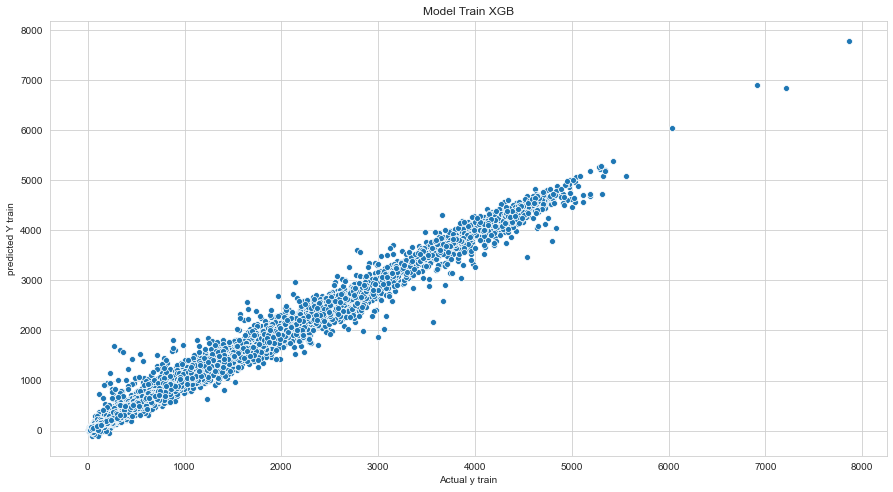

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_train,XGB_pipe_train_tuned)
plt.title('Model Train XGB')
plt.xlabel('Actual y train')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

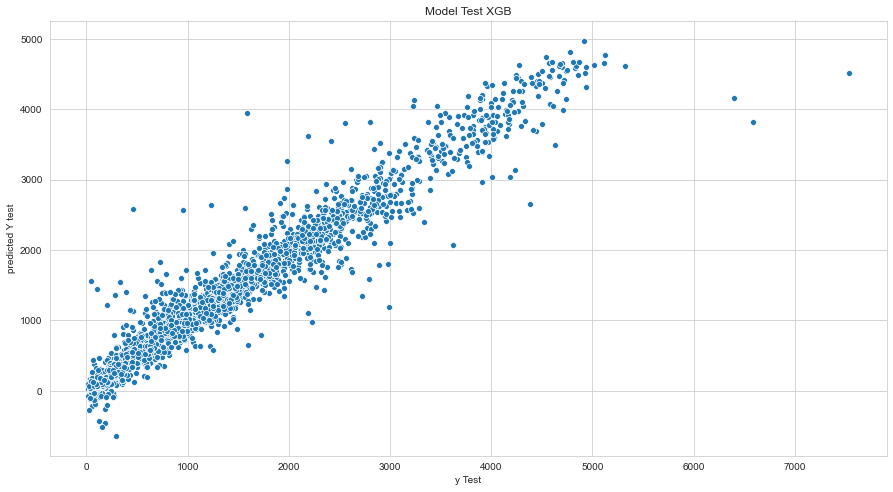

In [89]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_test,XGB_pipe_test_tuned)
plt.title('Model Test XGB')
plt.xlabel('y Test')
plt.ylabel('predicted Y test')
sns.set_style('whitegrid')

In [90]:
datatuned = {
    "R2 Score" : [RF_R2_train_tuned,RF_R2_test_tuned, DT_R2_train_tuned, DT_R2_test_tuned, XGB_R2_train_tuned, XGB_R2_test_tuned],
    "MAE" : [RF_MAE_train_tuned,RF_MAE_test_tuned, DT_MAE_train_tuned, DT_MAE_test_tuned, XGB_MAE_train_tuned, XGB_MAE_test_tuned],
    "MSE" : [RF_MSE_train_tuned,RF_MSE_test_tuned, DT_MSE_train_tuned, DT_MSE_test_tuned, XGB_MSE_train_tuned, XGB_MSE_test_tuned],
    "RMSE" : [RF_RMSE_train_tuned,RF_RMSE_test_tuned, DT_RMSE_train_tuned, DT_RMSE_test_tuned, XGB_RMSE_train_tuned, XGB_RMSE_test_tuned]}
dftuned=  pd.DataFrame(data = datatuned, index = ['RF Train Tuned', 'RF Test Tuned', 'DT Train Tuned', 'DT Test Tuned', 'XGB Train Tuned', 'XGB Test Tuned'])
dftuned

,R2 Score,MAE,MSE,RMSE
RF Train Tuned,0.954031,120.236168,10697.200483,103.427271
RF Test Tuned,0.939149,145.739943,72914.841336,270.027483
DT Train Tuned,0.952454,126.106827,55731.882620,236.076010
DT Test Tuned,0.919851,166.768347,96037.423133,309.899053
XGB Train Tuned,0.988559,68.738982,13411.265196,115.807017
XGB Test Tuned,0.952111,133.644332,57382.396892,239.546231


In [91]:
hypertunedmodel = pd.DataFrame({'Actual':y_test, 'Prediction XGB': XGB_pipe_test_tuned,'Prediction RF': RF_pipe_test_tuned, 'Prediction DT': DT_pipe_test_tuned})
hypertunedmodel.head(100).mean()

Actual            1188.200000
Prediction XGB    1162.887242
Prediction RF     1172.237324
Prediction DT     1163.247238
dtype: float64

- Looking from the model after tuning, we can see that the best model is Random Forest with 93 % of accuarcy and smallest error from the other model

### Test Data

In [98]:
datatest = [{
    't1' : -1,
    't2': -4,
    'hum': 10,
    'wind_speed': 40,
    'weather_code': 'Clear',
    'month': 'December',
    'day': 'Monday',
    'hour': '15'
    
}]

In [99]:
test = pd.DataFrame(datatest, index=[1])

In [100]:
model_RF.predict(test)[0].round()

940.0

### Import Model

In [96]:
import joblib

In [97]:
joblib.dump (RF_tuned, 'RandomForest Bikeshares Predictor')

['RandomForest Bikeshares Predictor']